# 正则表达式 <br>
维基的解释：https://zh.wikipedia.org/wiki/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F <br>
（英语：Regular Expression，在代码中常简写为regex、regexp或RE），是计算机科学的一个概念。正则表达式使用单个字符串来描述、匹配一系列匹配某个句法规则的字符串。在很多文本编辑器里，正则表达式通常被用来检索、替换那些匹配某个模式的文本。<br>
莫烦的教程帮助很大，希望多加运用：https://morvanzhou.github.io/tutorials/python-basic/basic/13-10-regular-expression/

In [6]:
#RegEx的库叫're'
import re
pattern1='dog'
pattern2='cat'
string='dog is in the house'
#python中的简单查找
print(pattern1 in string,'\t',pattern2 in string)
#re.search可以找到该元素的位置"span=(0, 3)"，如果没有这返回None
print(re.search(pattern1,string),'\t',re.search(pattern2,string))

True 	 False
<_sre.SRE_Match object; span=(0, 3), match='dog'> 	 None


## 模糊检索 <br>
也可以有更高级的形式<br>
[0-9,a-z]和[0-9a-z]都是被允许的，只要按照ASCII表由小到大都可以.一个[]代表对一个字符的检索


In [24]:
#regex的模糊检索
import re
# multiple patterns ("run" or "ran")
ptn = r"r[au]n"       # 引号"前的r意味着这是一个regex
print(re.search(ptn, "dog runs (ran) to cat"))  #但是很明显，只匹配第一个出现的位置 
#模糊检索也可以有更高级的形式
ptn0=r"B[0-9,a-z][0-9a-z]E"
print(re.search(ptn0,"BaiE"))

<_sre.SRE_Match object; span=(4, 7), match='run'>
<_sre.SRE_Match object; span=(0, 4), match='BaiE'>


一些特殊类型的匹配
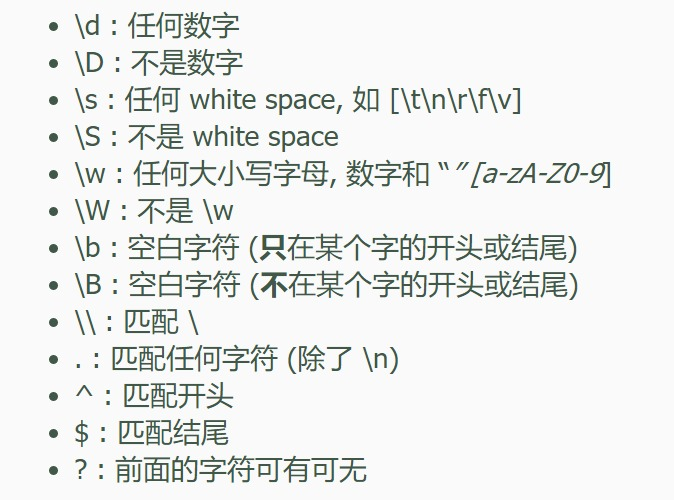
一些例子

In [31]:
import re

print(re.search(r"I'm OK.[\s]Thank you.","I'm OK.\nThank you."))
print(re.search(r"I'm OK.[\S]Thank you.","I'm OK.\nThank you."))

print(re.search(r"I love( you)?","I love him."))
print(re.search(r"I love( you)?","I love you."))


<_sre.SRE_Match object; span=(0, 18), match="I'm OK.\nThank you.">
None
<_sre.SRE_Match object; span=(0, 6), match='I love'>
<_sre.SRE_Match object; span=(0, 10), match='I love you'>


## 多行匹配<br>
添加参数 flags=re.M (or re.MULTILINE),当然貌似不加也可以找到

In [38]:
import re
string='''No pains.
No gains.'''
ptn1=r'gain'
print(re.search(ptn1,string))
print(re.search(ptn1,string,flags=re.M))

<_sre.SRE_Match object; span=(13, 17), match='gain'>
<_sre.SRE_Match object; span=(13, 17), match='gain'>


## 重复匹配——当存在不止一个符合<br>
在需要匹配的字符后面加上*、+、{n,m}、{n}

In [48]:
import re
print(re.search(r'r[ua]n*','ra'))#'*'允许不存在
print(re.search(r'r[ua]n+','rann'))
print(re.search(r'r*[ua]n{3}','rrrannnn'))#重复匹配'r'和'n'
print(re.search(r'r[ua]n{3,4}','rannn'))

<_sre.SRE_Match object; span=(0, 2), match='ra'>
<_sre.SRE_Match object; span=(0, 4), match='rann'>
<_sre.SRE_Match object; span=(0, 7), match='rrrannn'>
<_sre.SRE_Match object; span=(0, 5), match='rannn'>


## 对匹配分组<br>
我们可以为找到的内容分组, 使用 () 能轻松实现这件事. 通过分组, 我们能轻松定位所找到的内容. 比如在这个 (\d+) 组里, 需要找到的是一些数字, 在 (.+) 这个组里, 我们会找到 “Date: “ 后面的所有内容. 当使用 match.group() 时, 他会返回所有组里的内容, 而如果给 .group(2) 里加一个数, 它就能定位你需要返回哪个组里的信息.

In [2]:
import re
match = re.search(r"(\d+),Date: (.+)", "ID:021523,Date:Feb/12/2017")
print(match.group())                   
print(match.group(1))                  
print(match.group(2))                  

021523, Date: Feb/12/2017
021523
Feb/12/2017


给分组起名，可以避免寻找困难。<br>
我们字需要在括号的开头写上这样的形式 ?P< name > 就给这个组定义了一个名字. 然后就能用这个名字找到这个组的内容.即match.group('name')

In [9]:
import re
match=re.search(r"ID:(?P<ID>\d+),Date:(?P<Date>.+)","ID:021523,Date:Feb/12/2017")
print(match.group('Date'))

Feb/12/2017


一个不错的详尽的表格
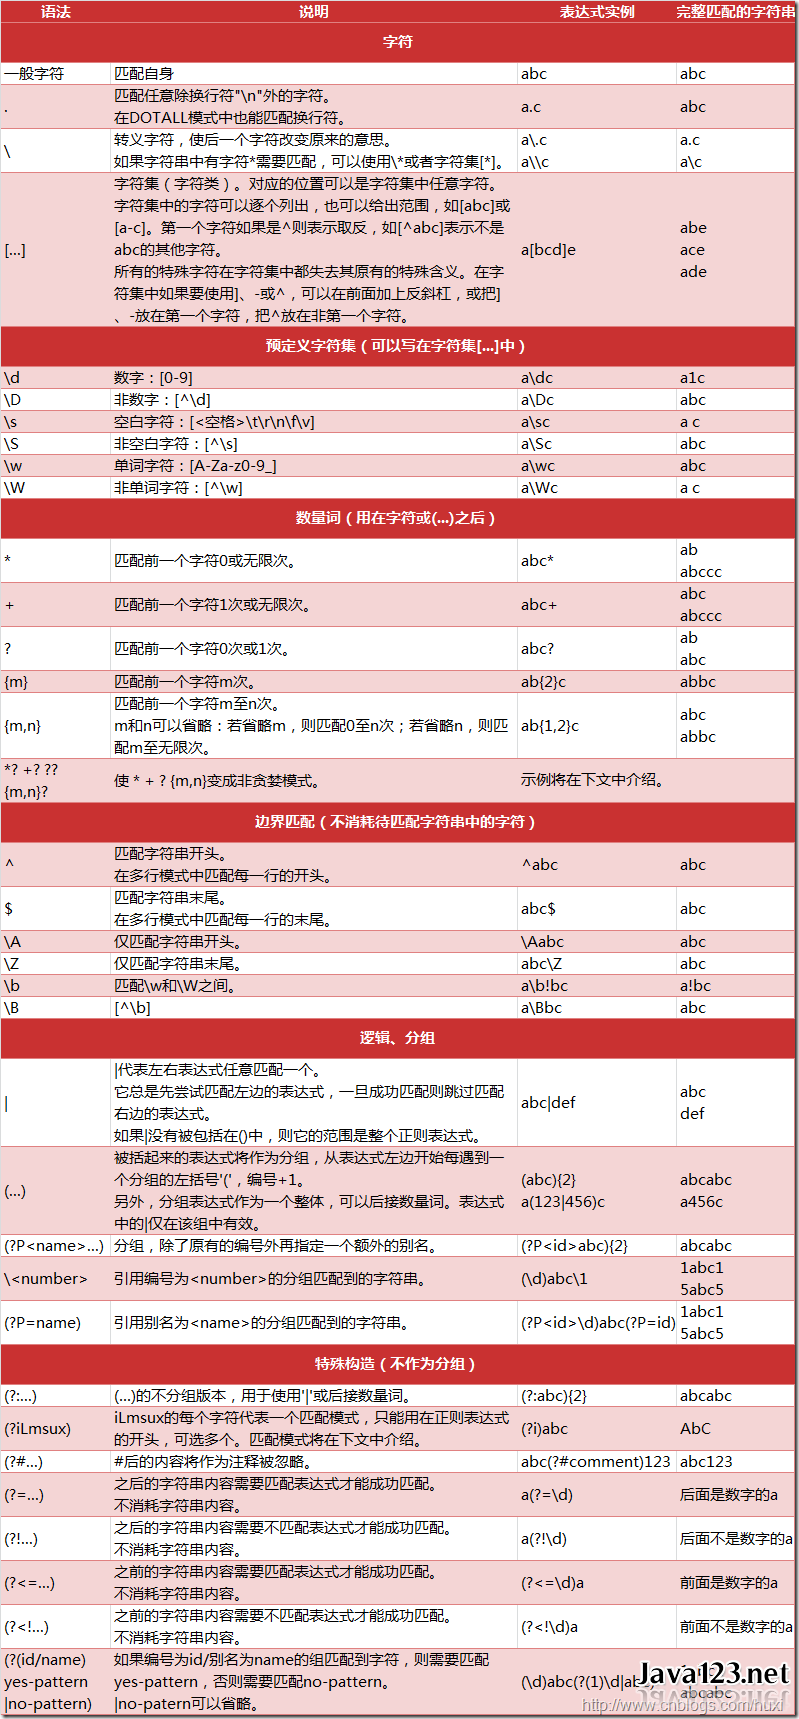

## 查找所有<br>
当要寻找的tag不止一个时，使用re.findall<br>
'|'表示对前后两个元素的查找，是 or 的意思。 

In [13]:
import re
#两者有明显的区别
print(re.findall(r"r[au]n","run ran runs ran"))
print(re.search(r"r[au]n","run ran runs ran"))
print(re.findall(r"(ran|run)","run ran runs ran"))

['run', 'ran', 'run', 'ran']
<_sre.SRE_Match object; span=(0, 3), match='run'>
['run', 'ran', 'run', 'ran']
<_sre.SRE_Match object; span=(0, 3), match='run'>


## 匹配和替换
我们还能通过正则表达式匹配上一些形式的字符串然后再替代掉这些字符串. 使用这种匹配 re.sub(), 将会比 python 自带的 string.replace() 要灵活多变.

In [24]:
import re
String="Dog runs to the cat."
print(re.sub(r"r[au]n[s]","catches",String))

if "runs" in String:
    print(String.replace("runs","catches"))

Dog catches to the cat.
Dog catches to the cat.


## 分割<br>
Python 中有个字符串的分割功能, 比如想获取一句话中所有的单词. 比如 "a is b".split(" "), 这样它就会产生一个列表来保存所有单词. 在regex中, 这种分割也可以做到.

In [30]:
import re
print(re.split(r"[,,,]","A,b,c,d"))
print(re.split(r"[,;\.]", "a;b,c.d;e"))  #'\.'是个转义字符表示匹配'.'，但是拿掉也可以，唔

['A', 'b', 'c', 'd']
['a', 'b', 'c', 'd', 'e']


## compile变量<br>
我们还能使用 compile 过后的正则, 来对这个正则重复使用. 先将正则 compile 进一个变量, 比如 compiled_re, 然后直接使用这个 compiled_re 来搜索.处处皆对象.

In [31]:
compiled_re = re.compile(r"r[ua]n")
print(compiled_re.search("dog ran to cat"))  

<_sre.SRE_Match object; span=(4, 7), match='ran'>
